# Aprendizaje Formal

## Práctica 4: Regresión Logística y Regularización - Apartado extra

La entrega de esta práctica no es obligatoria para su entrega pero se valorará positivamente en caso de realizarse y ser entregada.

### Índice de la práctica

- [Lectura de datos](#Lectura-de-datos)
- [Gráfica de los datos iniciales](#Gráfica-de-los-datos-iniciales)
- [Regresión logística con regularización](#Regresión-logística-con-regularización)


### Enunciado

Es esta nueva parte de la práctica debes utilizar lo aprendido para tratar de afrontar un problema de clasificación de dos clases satisfactoriamente.

El problema es conocido como Banana, por la formas que crean los ejemplos al ser dibujados. Esto es posible porque de nuevo estamos ante un conjunto de datos con dos características.

Tu tarea en esta práctica consiste en:
1. Leer los datos del problema (reutiliza la función `lecturaDatos`)
1. Mostrar los ejemplos del problema (puedes reciclar las funciones creadas anteriormente, es decir, `muestraGafica`)
1. Encontrar un modelo de regresión logística que permita obtener un buen resultado sobre el problema. Para ello,
    1. Elige el número de características polinomiales a utilizar (considera probar varios valores)
    1. Elige el valor $\lambda$ del parámetro de regularización (considera probar varias opciones)
    1. Muestra la frontera de decisión encontrada con cada prueba y el resultado de precisión obtenido (ejemplos acertados)

Importamos todas las librerías que vamos a utilizar durante la práctica.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from scipy.optimize import minimize

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline  

## Lectura de datos

Lee los datos disponibles en `banana.txt`. Puedes reutilizar la función `lecturaDatos`.

Posteriormente pásalos a una matriz $X$ con las características y un vector column $y$ para guardar la clase de cada ejemplo.

In [3]:
def lecturaDatos(nombreFichero, simboloDelimitador):
    datos = np.loadtxt(nombreFichero, delimiter=simboloDelimitador)
    
    print('Dimensiones de los datos: ',datos.shape)
    print(datos[0:5,:])
    return (datos)

In [4]:
# Crea las variables datos, X e y
datos = lecturaDatos('banana.txt', ',')
X = np.array(datos[:, :-1])
y = datos[:, -1].reshape(-1, 1)

Dimensiones de los datos:  (1061, 3)
[[-0.38  -1.27   0.   ]
 [-0.284 -1.02   0.   ]
 [-0.653 -0.734  0.   ]
 [-0.505  1.17   0.   ]
 [ 0.522  1.46   0.   ]]


## Gráfica de los datos iniciales

Define una función que te permita mostrar los ejemplos del problema (puedes reutilizar la función `muestraGrafica`) y muestra los ejemplos leídos en el paso anterior.

In [5]:
def muestraGrafica(datos, etiqueta_ejeX, etiqueta_ejeY, etiqueta_Positiva, etiqueta_Negativa, axes=None):
    claseNegativa = (datos[:, -1]==0)
    clasePositiva = (datos[:, -1]==1)
    
    if axes == None:
        fig = plt.figure(figsize=(6, 5))
        axes = fig.add_axes([0, 0, 1, 1])
        
    axes.scatter(datos[:, 0][clasePositiva], datos[:, 1][clasePositiva], label=etiqueta_Positiva, c='k', marker='+')
    axes.scatter(datos[:, 0][claseNegativa], datos[:, 1][claseNegativa], label=etiqueta_Negativa, c='y', marker='o')
    
    # Establecemos las etiquetas de los ejes
    axes.set_xlabel(etiqueta_ejeX)
    axes.set_ylabel(etiqueta_ejeY)
    
    # Añadimos la leyenda
    axes.legend(frameon= True, fancybox = True)


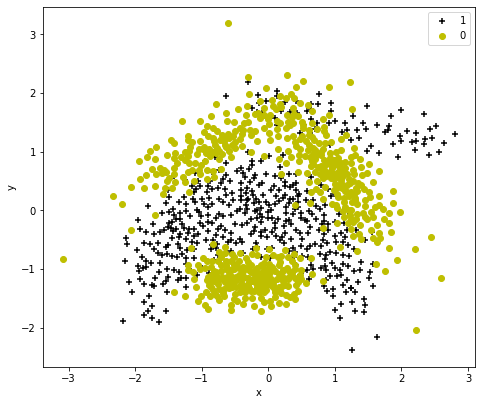

In [6]:
# Muestra los datos leídos
muestraGrafica(datos, 'x', 'y', '1', '0')

### Regresión logística con regularización

Ahora solo te queda aplicar los conocimientos adquiridos para resolver el problmea de clasificación. Quizás, la forma más sencilla sea haciendo uso de la librería scikit-learn.

Recuerda que:
1. Puedes usar diferentes valores para las características polinomiales [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
2. Puedes usar diferentes valores para el parámetro de regularización de la regresión logística (en scikit learn $C=1/\lambda$. [LogisticRegressios](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
3. Aunque en la parte de regularización lo hemos pasado por alto, recuerda que es recomendable normalizar los datos (media 0 y desviación estándar 1.0). Para ello puedes hacer uso de la clase StandardScaler de scikit-learn [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**Nota:** Puedes reutilizar el código utilizado en la práctica para mostrar las gráficas con diferentes valores de lambda para el problema anterior y modificarlo para que: 1) realice otro bucle donde se prueben diferentes valores de para las características y polinomiales; 2) normalice los datos tras obtener las características polinomiales en cada iteración.

AAAAAAAAAAAAAAA
[[-0.38  -1.27 ]
 [-0.284 -1.02 ]
 [-0.653 -0.734]
 ...
 [ 1.48   1.01 ]
 [-1.62  -0.896]
 [ 0.874 -0.769]]
Valores de theta para polynomial: 2 para lambda = 1e-101  son [-0.23807781 -0.1026523  -0.08032229  0.19161487  0.27644575 -0.49420416] 

Valores de theta para polynomial: 2 para lambda = 1.0  son [-0.23765314 -0.10220967 -0.08021485  0.19147681  0.27447631 -0.490882  ] 

Valores de theta para polynomial: 2 para lambda = 100.0  son [-0.21878348 -0.07403987 -0.06759814  0.16170213  0.17150322 -0.30941725] 


AAAAAAAAAAAAAAA
[[-0.38  -1.27 ]
 [-0.284 -1.02 ]
 [-0.653 -0.734]
 ...
 [ 1.48   1.01 ]
 [-1.62  -0.896]
 [ 0.874 -0.769]]
Valores de theta para polynomial: 3 para lambda = 1e-101  son [-0.31320889 -1.45032952 -0.08161288  0.00587497  0.72982664 -1.19760279
  0.76398211 -1.43745083  1.82761389  0.58473993] 

Valores de theta para polynomial: 3 para lambda = 1.0  son [-0.30489706 -1.34165512 -0.09464334  0.02214783  0.69364117 -1.13898642
  0.67221591 -1.335057

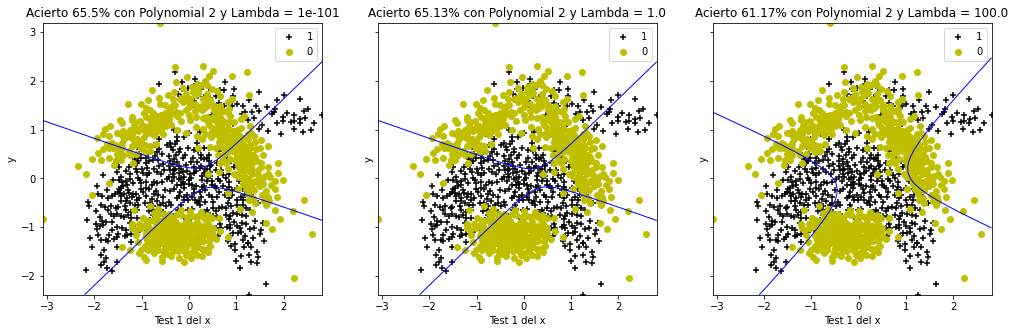

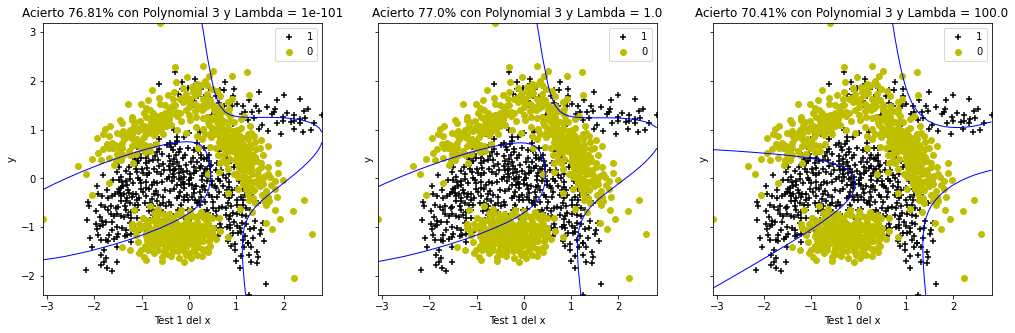

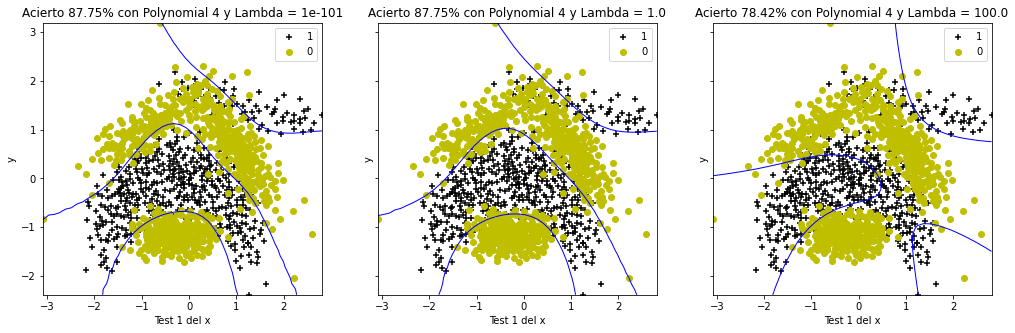

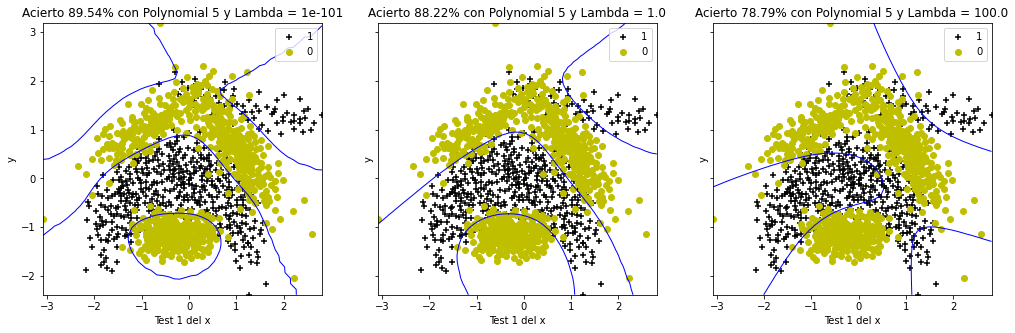

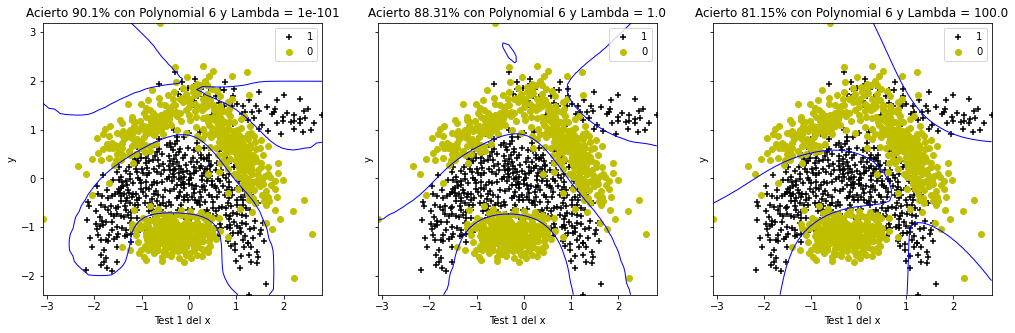

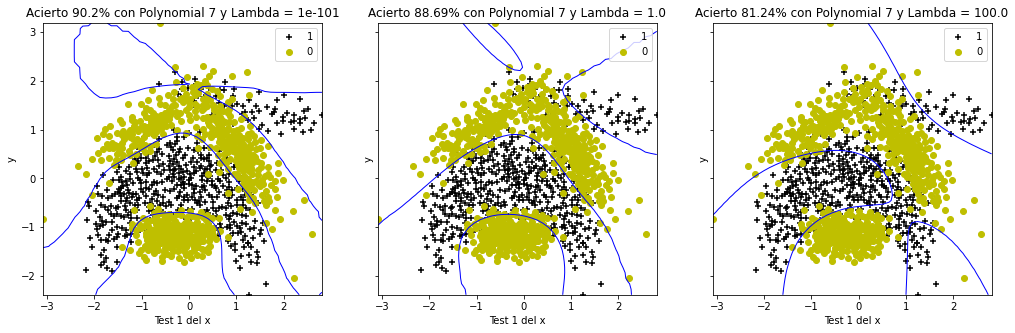

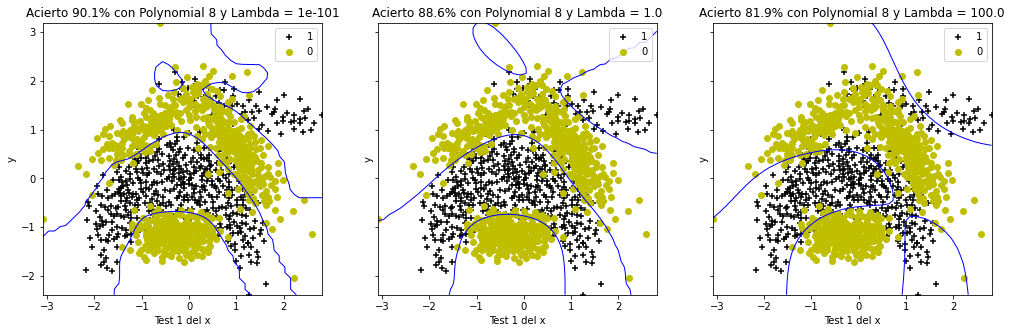

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

polynomials = np.array([2, 3, 4, 5, 6, 7, 8])

for pol in polynomials:
    poly = PolynomialFeatures(pol)
    XX = poly.fit_transform(X)
    fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))
    
    XX[:, 1:] = scaler.fit_transform(XX[:, 1:])
    x1_min, x1_max = X[:,0].min(), X[:,0].max(), 
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    xx = poly.fit_transform(np.hstack((xx1.reshape(-1,1), xx2.reshape(-1, 1))))
    xx[:, 1:] = scaler.transform(xx[:, 1:])
    

    valoresLambda = np.array([0.1e-100, 1, 100])

    for i, valorLambda in enumerate(valoresLambda):

        LogReg = LogisticRegression(penalty='l2', C=1/valorLambda, max_iter=400, solver='newton-cg')
        # Utiliza fit para ajustar el modelo a los datos XX con clases y (recuerda no pasar la columna de 1's)
        LogReg.fit(XX[:, 1:], y.ravel())


        # Cálculo del porcentaje de acierto (recuerda no pasar la columna de 1's)
        p = LogReg.predict(XX[:, 1:]).reshape(-1, 1)
        boolean_array = (p == y)
        correct = np.sum(boolean_array)
        accuracy = correct / p.size * 100

        # Gráfica que muestra los ejemplos, utiliza como último parámetro axes.flatten()[i] (le pasamos el manejador de la figura correspondiente)
        muestraGrafica(datos, 'Test 1 del x', 'y', '1', '0', axes=axes.flatten()[i])
        axes[i].set_title('Acierto ' + str(np.round(accuracy, 2)) + "% con Polynomial " + str(pol) + " y Lambda = " + str(valorLambda))

        # Mostramos la frontera de decisión, recuerda utilizar axes.flatten()[i] para utilizar el plot correspondiente
        # Recuerda no pasar la columna de 1's al predecir
        h = LogReg.predict_proba(xx[:, 1:])[:, 1]
        h = h.reshape(xx1.shape)
        axes[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

        # Mostrar los valores de theta para cada lambda "Los valores de theta para lambda = XX son [a, b, c...]"
        print("Valores de theta para polynomial:", pol, "para lambda =", valorLambda, " son", np.hstack((LogReg.intercept_, LogReg.coef_[0, :])), "\n") 
    print()

## Conclusiones
De todos los modelos obtenidos, ¿Con cuál te quedarías? ¿Simplemente te fijarías en el que más porcentaje de acierto tiene o deberíamos considerar su complejidad?

ESCRIBE TU RESPUESTA

Me quedaría con Lambda = 1 con el Polynomial = 5 ya que es la que más generalizada sin excederse ya que con los polynomials más bajos tenemos muy pococs aciertos y con los polynomials altos sobreentrenamos demasiado. Además con Lambda cerca de 0 y Lambda = 100 también se sobreentrena pudiendo dar a errores. No nos podemos fijar solo en el que más porcentaje tiene ya que estaría acertando mucho ahí pero puede confundir y estar sobreentrenado. Nos tendríamos que fijar también en la complejidad o sencillez que para ello la gráfica nos puede ayudar mucho.